In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline


In [51]:
seeds = pd.read_csv('seeds_dataset.txt', sep = '\t', header = None, error_bad_lines=False)

In [52]:
seeds.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [53]:
seeds.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## K-means clustering

In [61]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [64]:
# seperate the feature from target
seeds_data = seeds.iloc[:, :-1]
seeds_target = seeds.iloc[:, -1]
n_samples, n_features = seeds_data.shape
# get the number of types of seeds
n_types = len(np.unique(seeds_target))


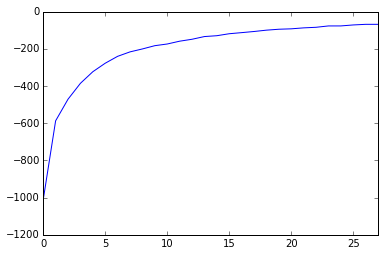

In [86]:

scores = []
for i in range(2, 30):
    kmeans_model = KMeans(n_clusters=i, random_state=1)
    kmeans_model.fit(seeds_data)
    score = kmeans_model.score(seeds_data)
    scores.append(score)
    
#print scores
pd.Series(scores).plot()

In [88]:
kmeans_model = KMeans(n_clusters=3, random_state=1)
kmeans_model.fit(seeds_data)
seeds_labels = kmeans_model.labels_
#random_state = 170
#target_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(data)

seeds_expected = seeds_target
seeds_predicted = kmeans_model.predict(seeds_data)
print(metrics.classification_report(seeds_expected, seeds_predicted))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.12      0.13      0.12        70
          2       0.14      0.14      0.14        70
          3       0.00      0.00      0.00        70

avg / total       0.09      0.09      0.09       210



In [89]:
print(metrics.confusion_matrix(seeds_expected, seeds_predicted))
print pd.Series(seeds_labels).value_counts()

[[ 0  0  0  0]
 [ 1  9 60  0]
 [60  0 10  0]
 [ 0 68  2  0]]
1    77
2    72
0    61
dtype: int64


## Expectation Maximization

In [99]:
from sklearn import mixture

gmm = mixture.GMM(n_components=3, covariance_type='full')
gmm.fit(seeds_data)


GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [100]:
seeds_predicted = gmm.predict(seeds_data)
print(metrics.confusion_matrix(seeds_expected, seeds_predicted))

[[ 0  0  0  0]
 [57 12  1  0]
 [ 0  0 70  0]
 [ 0 70  0  0]]


In [101]:
gmm.score(seeds_data);

## PCA model 

In [68]:
from sklearn.decomposition import PCA

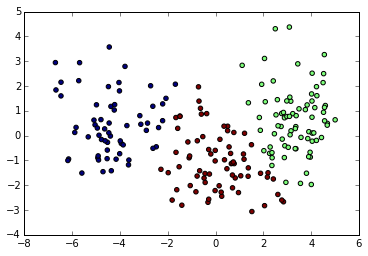

In [103]:

#Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(seeds_data)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=seeds_labels)
# Show the plot.
plt.show()

In [115]:

pca = PCA(n_components = 7)
pca.fit(seeds_data)
print pca.explained_variance_ratio_
variance_explained = pca.explained_variance_ratio_
variance_explained = pd.Series(variance_explained)

[  8.29385197e-01   1.63632452e-01   5.65790880e-03   9.90306086e-04
   2.11180347e-04   1.20677139e-04   2.27879552e-06]


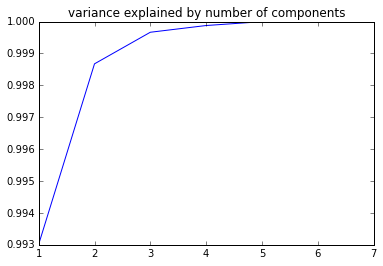

In [137]:
components = pd.Series(range(1, 8))
ve =pd.Series(variance_explained.cumsum(), index=pd.Series(range(1, 8)))
ve.plot()
plt.title("variance explained by number of components")

## ICA

In [109]:
from sklearn.decomposition import FastICA

In [111]:
ica = FastICA(n_components = 3)
ica.fit(seeds_data)
print ica.get_params()

{'fun_args': None, 'algorithm': 'parallel', 'max_iter': 200, 'random_state': None, 'n_components': 3, 'tol': 0.0001, 'fun': 'logcosh', 'w_init': None, 'whiten': True}


## Random Projection

In [138]:
from sklearn import random_projection
rp = random_projection.GaussianRandomProjection()
rp.fit(seeds_data)


ValueError: eps=0.100000 and n_samples=210 lead to a target dimension of 4583 which is larger than the original space with n_features=7

In [102]:
#
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape


(100, 3947)

In [ ]:
x